<a href="https://colab.research.google.com/github/MassielC/ML_teaching/blob/main/introductory_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manipulación y visualización de datos: Dataset de Diagnóstico de cáncer de mama de Wisconsin

- **Fecha:** 01 de Septiembre
- **Autor:** Massiel Copara
- **Objetivo:** En esta sesión, entenderemos el flujo de trabajo de un proyecto de Machine Learning básico, utilizando el conjunto de datos de diagnóstico de cáncer de mama de Wisconsin.

## 1. Carga de datos

- Asegúrate de que el conjunto de datos se cargue correctamente sin errores.
- Comprende la estructura y el contenido del conjunto de datos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc

data = pd.read_csv("data.csv", header=0)
# Mostrar las primeras filas del conjunto de datos
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Mostrar un resumen estadístico de las columnas numéricas
data.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

## 2. Limpieza de Datos y preprocesamiento



- Manejar los valores faltantes de manera apropiada.
- Eliminar o corregir datos erróneos.
- Convertir tipos de datos si es necesario.

In [ ]:
# Verificar valores faltantes
data.isnull().sum()


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
# Limpieza de Datos: Eliminar la columna ID y manejar los valores faltantes
data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)

# Convertir la columna 'diagnosis' a binario
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
features_mean=list(data.columns[1:11])
features_mean

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

## 3. Estadística Descriptiva
Resumen y describen las características principales de un conjunto de datos. Proporcionan una visión general rápida de los datos, ayudando a entender su tendencia central, dispersión y distribución general.

**Puntos Clave**:
- Las medidas de tendencia central incluyen la media, mediana y moda.
- Las medidas de dispersión incluyen el rango, la varianza y la desviación estándar.
- Utiliza estas estadísticas para detectar patrones y anomalías en los datos.

### Visualización: Histograma
Distribución de datos numéricos, que muestra la frecuencia de puntos de datos dentro de rangos especificados (bins).

**Importancia**: Ayuda a entender la distribución, dispersión y tendencia central de una variable, facilitando la detección de patrones y valores atípicos.

**Puntos Clave**:
- Elige anchos de bin apropiados para equilibrar el detalle y la claridad.
- Utiliza histogramas para comparar distribuciones entre diferentes grupos.

**Preguntas Críticas:**
1. ¿Qué nos dice la distribución sobre la dispersión y la tendencia central en cada feature?
2. ¿Hay algún valor atípico o patrones inusuales en los datos?
3. ¿Cómo se compara la distribución de cada feature entre tumores benignos y malignos?

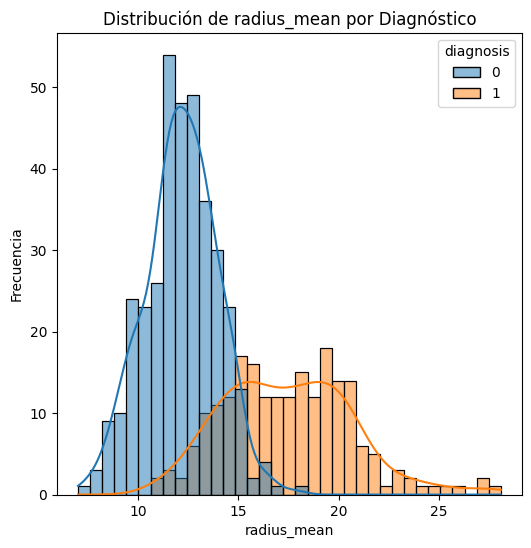

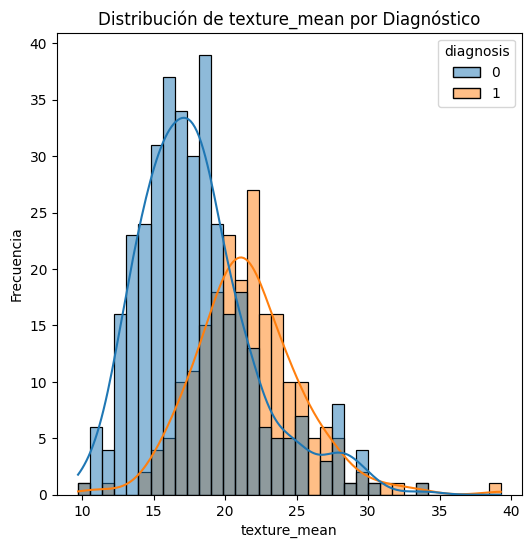

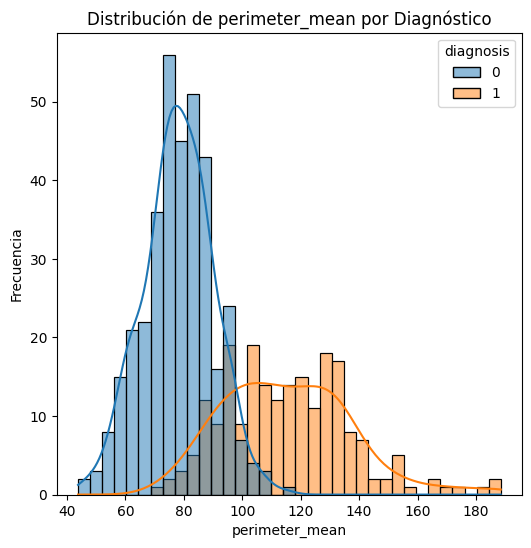

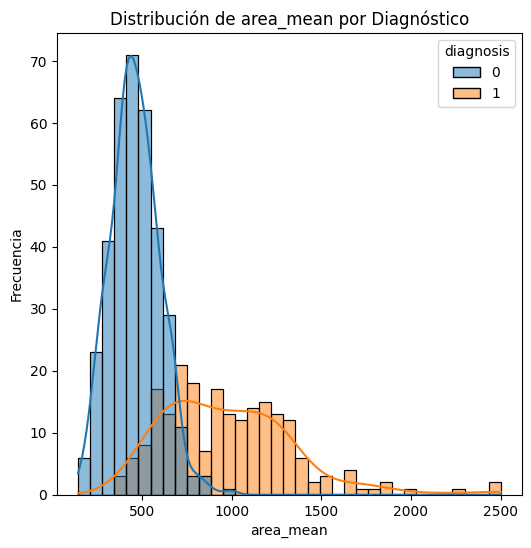

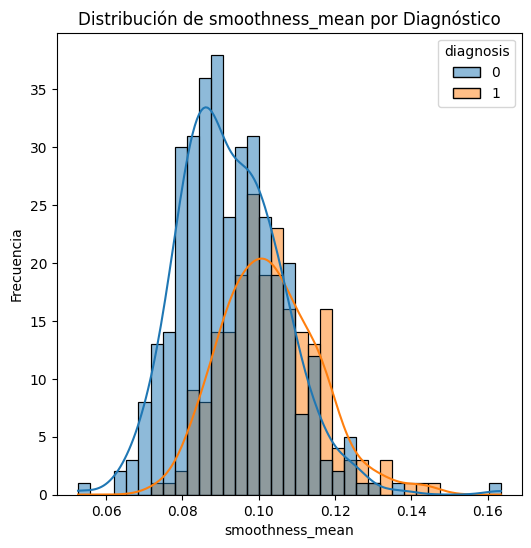

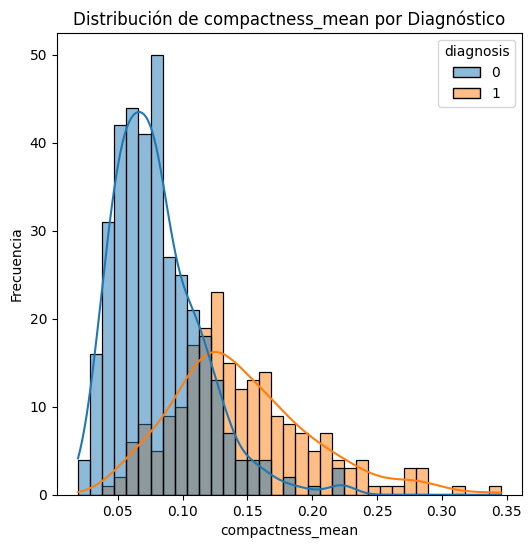

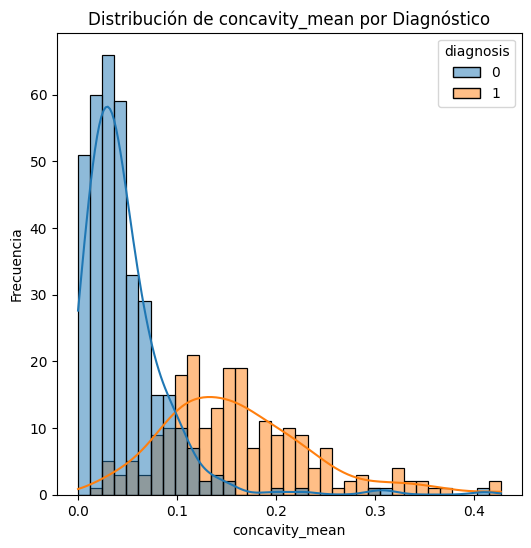

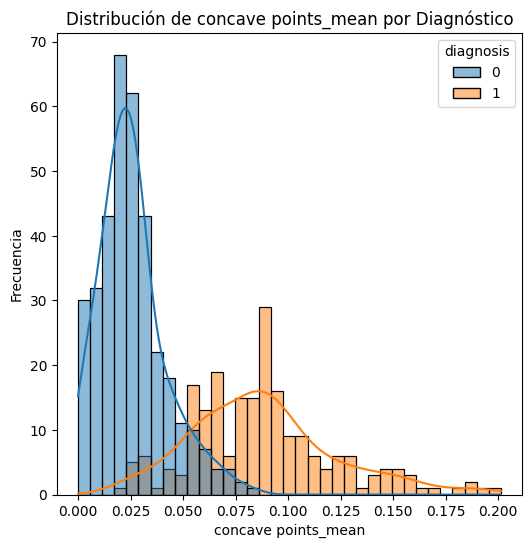

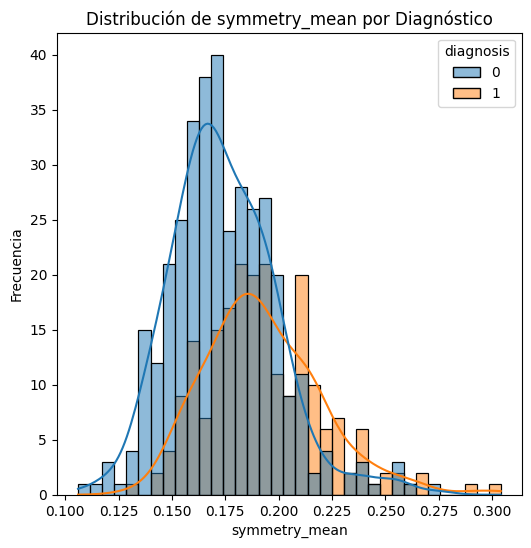

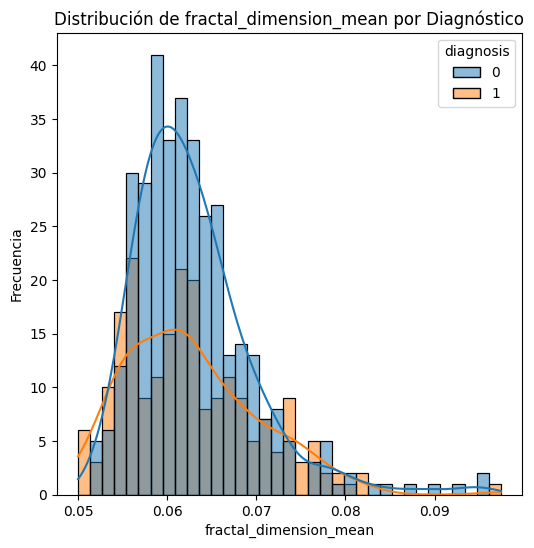

In [ ]:
# Crear histogramas para cada característica, divididos por diagnóstico
for feature in features_mean:
  plt.figure(figsize=(6, 6))
  sns.histplot(data=data, x=feature, hue='diagnosis', kde=True,bins=35)
  plt.title(f'Distribución de {feature} por Diagnóstico')
  plt.xlabel(feature)
  plt.ylabel('Frecuencia')
  plt.show()


### Visualización: Gráfico de Caja
Forma estandarizada de mostrar la distribución de datos basada en un resumen de cinco números: mínimo, primer cuartil (Q1), mediana, tercer cuartil (Q3) y máximo.

**Importancia**: Proporciona un resumen visual de los datos, mostrando su tendencia central, variabilidad y cualquier valor atípico.

**Puntos Clave**:
- Utiliza gráficos de caja para comparar distribuciones entre diferentes grupos.
- Identifica e investiga los valores atípicos en los datos.

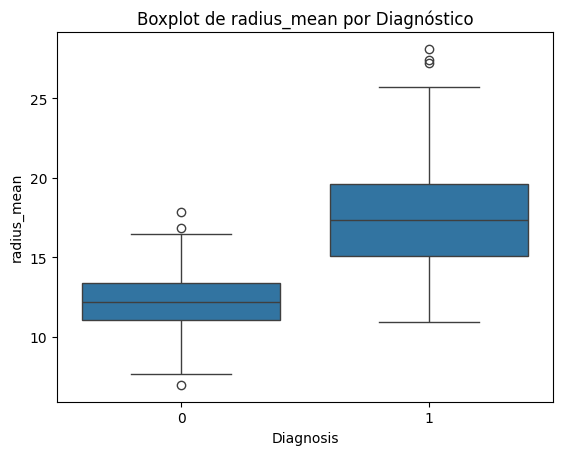

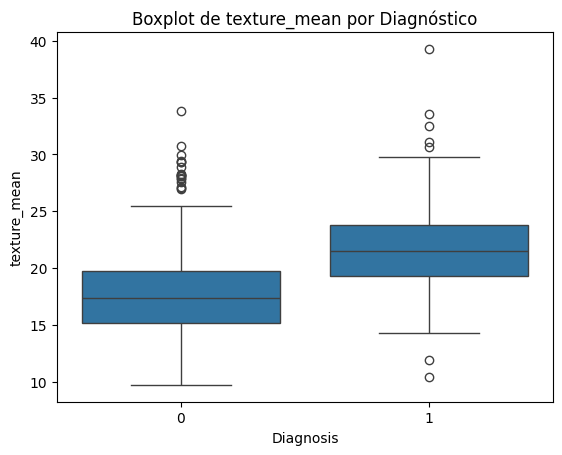

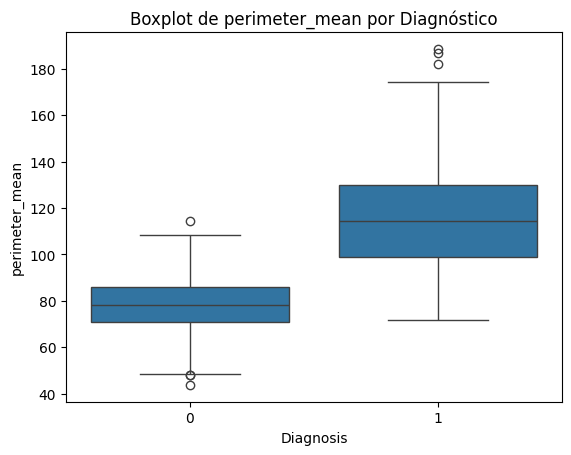

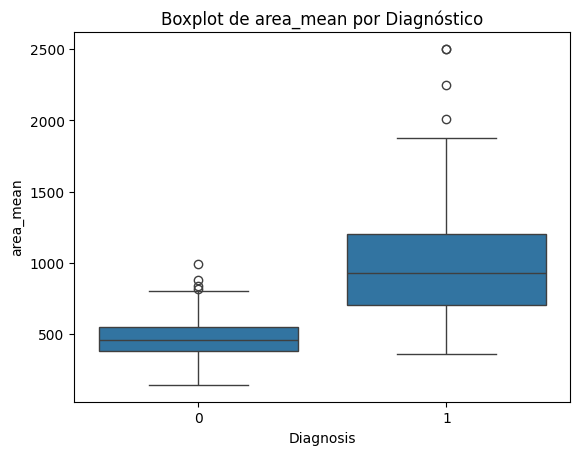

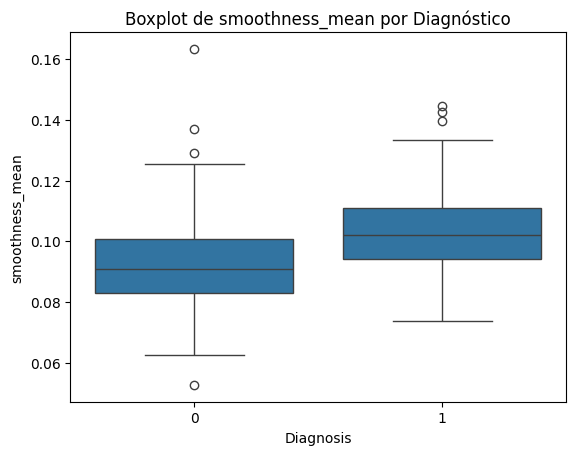

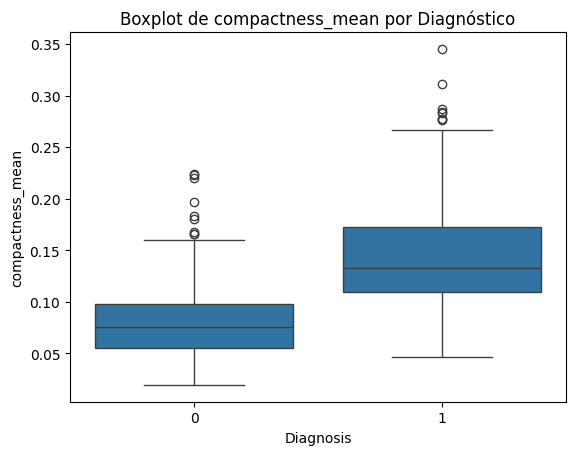

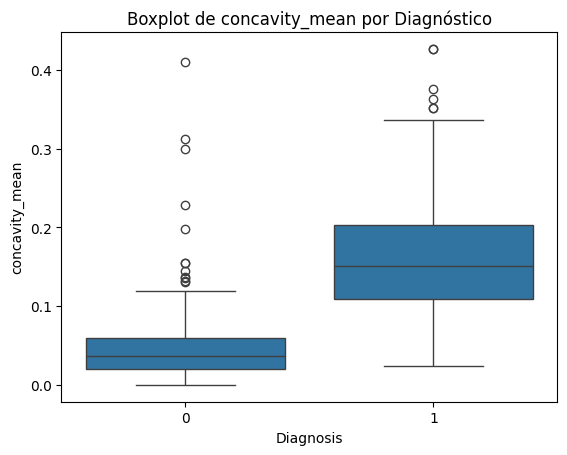

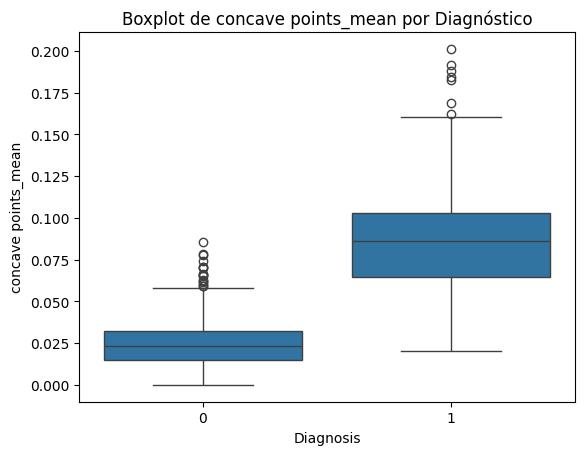

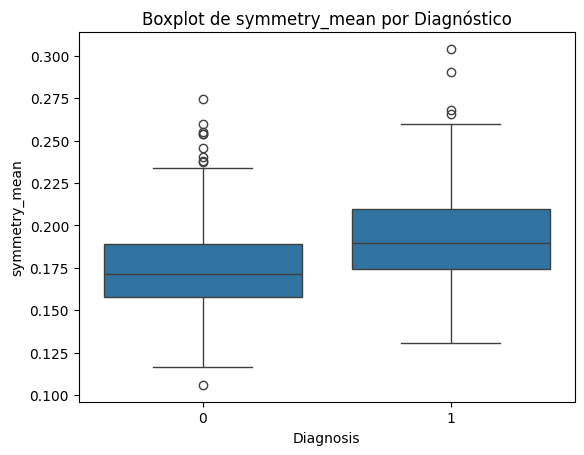

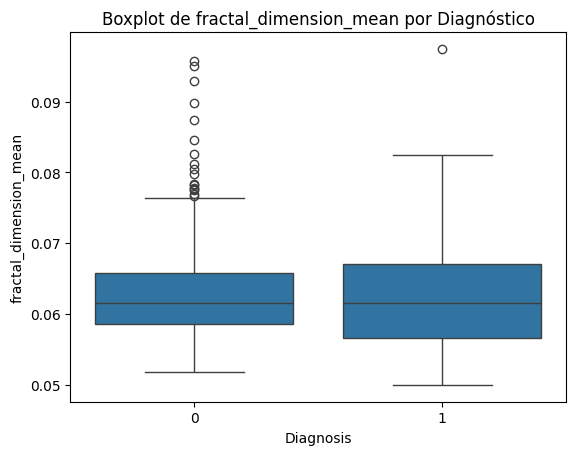

In [ ]:
# Crear boxplots para cada característica, divididos por diagnóstico
for feature in features_mean:
  plt.figure(figsize=(6, 6)
  sns.boxplot(data=data, x='diagnosis', y=feature)
  plt.title(f'Boxplot de {feature} por Diagnóstico')
  plt.xlabel('Diagnosis')
  plt.ylabel(feature)
  plt.show()


## 4. División del Conjunto de Datos en Entrenamiento y Prueba

---


Implica dividir los datos en dos partes: una para entrenar el modelo y otra para evaluar su rendimiento.

**Importancia**: Permite una evaluación imparcial del rendimiento del modelo en datos no vistos, ayudando a prevenir el sobreajuste.

**Puntos Clave**:
- Asegura una división representativa que mantenga la distribución de la variable objetivo.
- Utiliza random_state para asegurar la reproducibilidad.

In [ ]:
# División del Conjunto de Datos en Entrenamiento y Prueba
X =  data.iloc[:, 1:11]
y = data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Modelo de Regresión Logística
La regresión logística es un modelo estadístico utilizado para predecir la probabilidad de un resultado binario basado en una o más variables predictoras.

**Importancia**: Comúnmente utilizado para problemas de clasificación, especialmente en investigación médica y biológica.

**Puntos Clave**:
- Asegura que el modelo esté correctamente entrenado y validado.
- Interpreta los coeficientes del modelo para entender el impacto de cada variable predictora.

In [ ]:
# Modelo de Regresión Logística
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 6. Evaluación del rendimiento de nuestro modelo:

### Matriz de Confusión
**Definición**: Una matriz de confusión es una tabla utilizada para evaluar el rendimiento de un modelo de clasificación al comparar las etiquetas de clase predichas y reales.

**Importancia**: Proporciona un desglose detallado del rendimiento del modelo, incluyendo verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

**Puntos Clave**:
- Utiliza matrices de confusión para calcular métricas como precisión, sensibilidad y puntaje F1.
- Identifica áreas donde el modelo puede estar haciendo predicciones incorrectas.

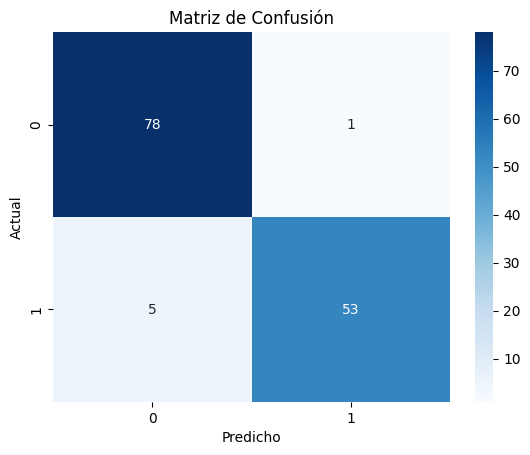

La matriz de confusión muestra el rendimiento del modelo de regresión logística. El eje x representa la clase predicha y el eje y representa la clase real.


In [ ]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.show()


### Explicación de la Matriz de Confusión
La matriz de confusión muestra el rendimiento del modelo de regresión logística. El eje x representa la clase predicha y el eje y representa la clase real.

**Preguntas Críticas:**
1. ¿Qué tan bien funciona el modelo en la clasificación de tumores benignos y malignos?
2. ¿Cuáles son las tasas de falsos positivos y falsos negativos, y qué implican?
3. ¿Cómo podrías mejorar el rendimiento del modelo?

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#precision_score(y_test, y_pred)


Accuracy: 0.9298245614035088


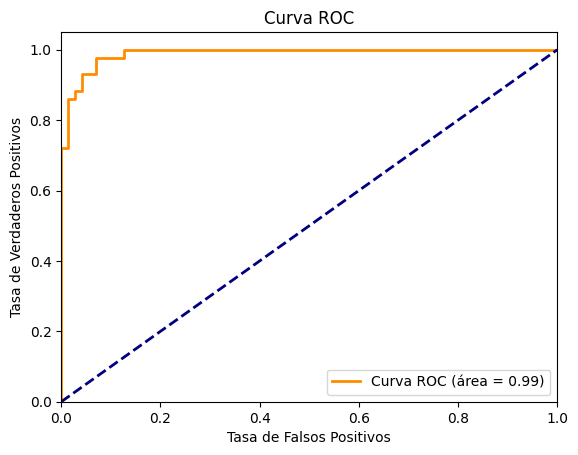

In [ ]:
# Generar la curva ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


## Conclusiones:

¿Ustedes confiarían en este modelo para predecir si el tumor es benigno o maligno?